In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [6]:
def plotData(X,y):
    pos = (y==1).ravel()
    neg = (y==0).ravel()
    
    plt.scatter(X[pos,0],X[pos,1], s=60, c='k', marker='+',linewidth=1)
    plt.scatter(X[neg,0],X[neg,1], s=60, c='y', marker='o',linewidth=1)

In [43]:
def plotSvc(svc,X,y,h=0.02,pad=0.25):
    x_min,x_max = X[:,0].min()-pad, X[:,0].max()+pad
    y_min,y_max = X[:,1].min()-pad, X[:,1].max()+pad
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    pred_set = np.c_[xx.ravel(),yy.ravel()]
    Z= svc.predict(pred_set)
    Z = Z.reshape(xx.shape) # Note it
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.2)
    
    plotData(X,y)
    # plot support vectors
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='3')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# Support Vector Machines

## Example 1

In [3]:
data = loadmat('data/ex6data1.mat')
data.keys()

['y', 'X', '__version__', '__header__', '__globals__']

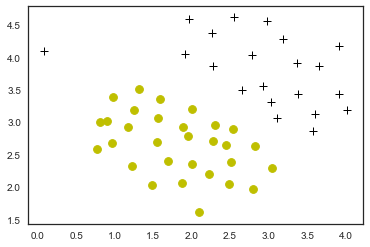

In [45]:
plotData(data['X'],data['y'])

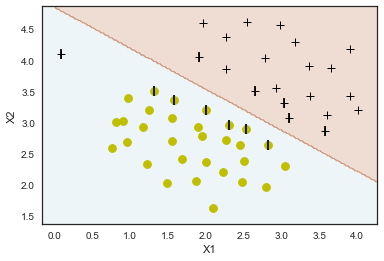

('Number of support vectors: ', 12)


In [44]:
clf = SVC(C=1.0,kernel='linear')
clf.fit(data['X'],data['y'].ravel())
plotSvc(clf,data['X'],data['y'])

## Example 2

In [46]:
data = loadmat('data/ex6data2.mat')
data.keys()

['y', 'X', '__version__', '__header__', '__globals__']

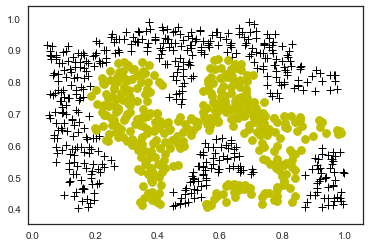

In [47]:
plotData(data['X'],data['y'])

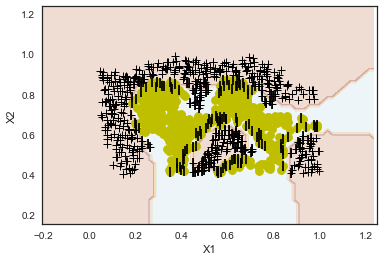

('Number of support vectors: ', 219)


In [53]:
clf = SVC(C=100,kernel='rbf',gamma=6)
clf.fit(data['X'],data['y'].ravel())
plotSvc(clf,data['X'],data['y'])

## Example 3

In [54]:
data = loadmat('data/ex6data3.mat')
data.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']

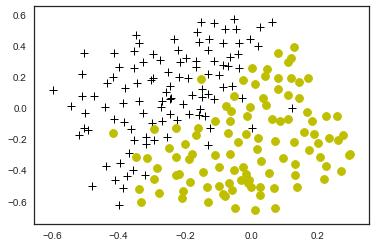

In [55]:
plotData(data['X'],data['y'])

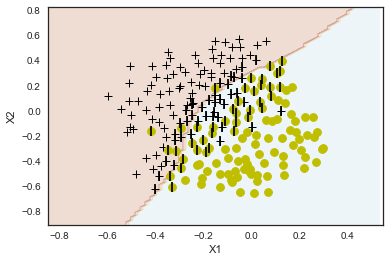

('Number of support vectors: ', 78)


In [62]:
clf = SVC(C=1.0,kernel='poly',degree=3,gamma=10)
clf.fit(data['X'],data['y'].ravel())
plotSvc(clf,data['X'],data['y'])